# Introduction to AVISO-data

The following notebook highlights how to import the [AVISO data set](http://aviso.oceanobs.com) (2D satellite-altimetry-derived ocean surface current product). The data is freely available from the [Copernicus Marine Environment](https://marine.copernicus.eu).

The sea surface height $ h $ acts as a stream function for the geostrophic ocean surface velocity field. Particle trajectories on the ocean surface are approximately trajectories of the 2D system of ODEs:

\begin{align}
\dot{\varphi} &= -\dfrac{g}{R^2f(\theta)cos(\theta)}\partial_{\theta}h(\phi, \theta, t) \\
\dot{\theta} &= \dfrac{g}{R^2f(\theta)cos(\theta)}\partial_{\varphi}h(\phi, \theta, t),
\end{align}

where $ \varphi, \theta $ respectively are the longitudinal and latitudinal position of the particle, $ g $ is the constant of gravity, $ R $ is the mean radius, $ f(\theta) = 2\Omega \sin(\theta) $ is the coriolis parameter and $ \Omega $ is the mean angular velocity of the earth.

The AVISO-data provides global coverage of ocean currents at daily time-intervals with a spatial resolution of $ 0.25^{\circ} $. As part of this work, we focus the commonly studied Agulhas region in the Southern Ocean:

\begin{equation}
(\varphi, \theta) \in [14^{\circ}W, 9^{\circ}E] \times [39^{\circ}S, 21^{\circ}S]
\end{equation}

over a period of (maximum) 90 days starting at $ t_0 = 24 $ Novembre 2006.

# Save data in a '.mat' file

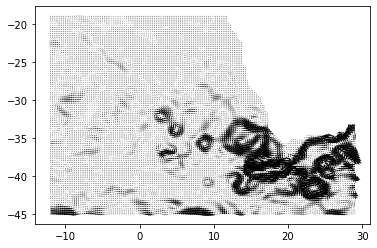

Wall time: 283 ms


In [12]:
%%time
import scipy.io as sio
import numpy as np
import sys, os

# get current directory
path = os.getcwd()

#Import velocity data from file in data-folder
mat_file = sio.loadmat('AVISO.mat')

U = mat_file['vx'].transpose()
V = mat_file['vy'].transpose()
x = mat_file['xc'].transpose()
y = mat_file['yc'].transpose()
time_data = mat_file['time'].reshape(1,-1)

U[U==0] = np.nan
V[V==0] = np.nan

import matplotlib.pyplot as plt
plt.quiver(x, y, U[:,:,0], V[:,:,0])
plt.show()

# save data to 'AVISO.mat' file in folder 'data'
scipy.io.savemat('AVISO.mat', {'u': U, 'v': V, 'x': x, 'y': y, 't': time_data})